In [1]:
import sys, os
sys.path.append(os.path.abspath('../../../../classifiers'))
sys.path.append(os.path.abspath('../../../../training'))
sys.path.append(os.path.abspath('../../../../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
range_step = 50
k_times_fold = 10

In [3]:
iris = datasets.load_iris()

y = iris.target
X = PCA(n_components=4).fit_transform(iris.data)[:, :]

In [4]:
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = False
dic_classifier_params["normalize_axis"] = 1

In [5]:
dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "do_classes_refit":True,
    "reset_weights_epoch":0,
    "batch":1}

In [6]:
%run ../printing_methods.ipynb

In [7]:
negativities_per_class = []
entropies_per_class = []
for clazz in range(len(set(y))):
    negativities_per_class.append([])
    entropies_per_class.append([])

In [8]:
%%time
scores_list = []
f1scores_list = []

for max_iter in range(1, 1000, range_step):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, output_dict = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed=1, 
                    classifier_function=iqc_classifier, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(np.mean(scores))
    f1scores_list.append(np.mean(f1scores))

    for clazz in range(len(set(y))):
        negativities_per_class[clazz].append(np.mean(output_dict["negativities"][clazz]))
        entropies_per_class[clazz].append(np.mean(output_dict["entropies"][clazz]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.2s finished


K-Fold #0
Mean negativities for all classes: [0.24306030095056155, 0.0840034839973409, 0.08264317442809636]
Mean entropies for all classes: [3.224073703600356e-15, 4.301656886206923e-15, 3.275844189808131e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished


K-Fold #1
Mean negativities for all classes: [0.24712528565077682, 0.08491665178274443, 0.07678201145659891]
Mean entropies for all classes: [3.537443560372179e-15, 3.65643354182646e-15, 4.664972000540826e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #2
Mean negativities for all classes: [0.2443548273624877, 0.10053841270999789, 0.09490338003418959]
Mean entropies for all classes: [3.3955041512391404e-15, 3.593781080598641e-15, 3.2017703986167607e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #3
Mean negativities for all classes: [0.23916850596697323, 0.09192042980742908, 0.08950170604142312]
Mean entropies for all classes: [2.8401311854057688e-15, 3.8321410710776256e-15, 3.506135487232946e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


K-Fold #4
Mean negativities for all classes: [0.24141954870317747, 0.06179827065973819, 0.05995924315541226]
Mean entropies for all classes: [3.2486321774184563e-15, 3.3603171945669416e-15, 3.4244126410665453e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5
Mean negativities for all classes: [0.2427289884881307, 0.07940497333936343, 0.07354488213006173]
Mean entropies for all classes: [3.257591149953951e-15, 3.436031797497544e-15, 3.966836869044682e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24580261461340208, 0.09010008701782854, 0.07928430239056826]
Mean entropies for all classes: [3.828978104242025e-15, 3.0473335870411755e-15, 3.2443282065398876e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #7
Mean negativities for all classes: [0.2429112375093985, 0.08896844822824544, 0.08435822859047999]
Mean entropies for all classes: [2.9358057764347402e-15, 3.50223867010632e-15, 3.1570831138507175e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #8
Mean negativities for all classes: [0.2476956241907538, 0.08953057173939806, 0.0885051329764535]
Mean entropies for all classes: [3.0892977299922498e-15, 3.2899794170927746e-15, 2.786013416838205e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


K-Fold #9
Mean negativities for all classes: [0.24698847899871842, 0.09400998199343642, 0.08449721796234927]
Mean entropies for all classes: [3.501602233020966e-15, 3.8883954736660306e-15, 3.3446544495768144e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.0 F1-Scores = 0.0 Negativity = [0.13656898645866627, 0.13627464963004007, 0.1465988733688917] Entropy = [3.60052492653847e-15, 3.952949700913155e-15, 3.397018543484847e-15]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.08351789205334678, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.015081281431073e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.60      0.60      0.60         5
           2       0.75      0.60      0.67         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.09000727944372997, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.3119922800051836e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.1200207411256589, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.157809655229489e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.25      0.20      0.22         5
           2       0.67      0.40      0.50         5

    accuracy                           0.53        15
   macro avg       0.51      0.53      0.50        15
weighted avg       0.51      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.3s finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.0963738686258567, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 3.647879708789716e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.60      0.60      0.60         5
           2       0.75      0.60      0.67         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.06179827065973819, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.3603171945669416e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.07827874387530812, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.1503606455501363e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.67      0.40      0.50         5
           2       0.60      0.60      0.60         5

    accuracy                           0.67        15
   macro avg       0.66      0.67      0.64        15
weighted avg       0.66      0.67      0.64        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.2s finished


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.09010008701782854, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.0473335870411755e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.09488654917124131, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 3.430287196138266e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.40      0.50         5
           2       0.57      0.80      0.67         5

    accuracy                           0.73        15
   macro avg       0.75      0.73      0.72        15
weighted avg       0.75      0.73      0.72        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.09254400967553773, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.3097395372825518e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.38      0.60      0.46         5
           2       0.33      0.20      0.25         5

    accuracy                           0.53        15
   macro avg       0.57      0.53      0.53        15
weighted avg       0.57      0.53      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.10277838870760213, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 4.2574610692155324e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7266666666666667 F1-Scores = 0.7165475265475265 Negativity = [0.1993855536325638, 0.19280588105923327, 0.21234879329675072] Entropy = [3.3038944695063456e-15, 3.194750367726542e-15, 3.0672760312466873e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.1s finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.08351789205334678, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.015081281431073e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.60      0.60      0.60         5
           2       0.75      0.60      0.67         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.9s finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.09000727944372997, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.3119922800051836e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.8s finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.1200207411256589, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.157809655229489e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.25      0.20      0.22         5
           2       0.67      0.40      0.50         5

    accuracy                           0.53        15
   macro avg       0.51      0.53      0.50        15
weighted avg       0.51      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.3s finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.0963738686258567, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 3.647879708789716e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.60      0.60      0.60         5
           2       0.75      0.60      0.67         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.35344858002573337, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0640879830396097e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3494732490340999, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.0187001299172243e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.09010008701782854, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.0473335870411755e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.0s finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.09488654917124131, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 3.430287196138266e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.40      0.50         5
           2       0.57      0.80      0.67         5

    accuracy                           0.73        15
   macro avg       0.75      0.73      0.72        15
weighted avg       0.75      0.73      0.72        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.09254400967553773, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.3097395372825518e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.38      0.60      0.46         5
           2       0.33      0.20      0.25         5

    accuracy                           0.53        15
   macro avg       0.57      0.53      0.53        15
weighted avg       0.57      0.53      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.10277838870760213, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 4.2574610692155324e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.75      0.60      0.67         5
           2       0.80      0.80      0.80         5

    accuracy                           0.80        15
   macro avg       0.79      0.80      0.79        15
weighted avg       0.79      0.80      0.79        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6933333333333332 F1-Scores = 0.6666635216635216 Negativity = [0.1993855536325638, 0.19280588105923327, 0.21234879329675072] Entropy = [3.3038944695063456e-15, 3.194750367726542e-15, 3.0672760312466873e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.0s finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3534538615788721, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.3091484767458656e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         5
           2       0.67      0.80      0.73         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.4s finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.3810838434764881, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 4.548100983296959e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.1200207411256589, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.157809655229489e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.25      0.20      0.22         5
           2       0.67      0.40      0.50         5

    accuracy                           0.53        15
   macro avg       0.51      0.53      0.50        15
weighted avg       0.51      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.5s finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.34758926135877327, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 4.064712108704429e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.50      0.20      0.29         5
           2       0.83      1.00      0.91         5

    accuracy                           0.67        15
   macro avg       0.63      0.67      0.62        15
weighted avg       0.63      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.35697316733061235, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 4.0321526210338205e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3734275681733507, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.5088618835283114e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.6s finished


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.34144650660031617, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.677129997447746e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5

    accuracy                           0.87        15
   macro avg       0.90      0.87      0.86        15
weighted avg       0.90      0.87      0.86        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.09488654917124131, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 3.430287196138266e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.40      0.50         5
           2       0.57      0.80      0.67         5

    accuracy                           0.73        15
   macro avg       0.75      0.73      0.72        15
weighted avg       0.75      0.73      0.72        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.7s finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.09254400967553773, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.3097395372825518e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.38      0.60      0.46         5
           2       0.33      0.20      0.25         5

    accuracy                           0.53        15
   macro avg       0.57      0.53      0.53        15
weighted avg       0.57      0.53      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.6s finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.35236904399548974, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 3.3247822319739275e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6533333333333333 F1-Scores = 0.6067994967994967 Negativity = [0.2893642101410722, 0.289831402403486, 0.21234879329675072] Entropy = [3.4019168679446103e-15, 3.606786602157134e-15, 3.0672760312466873e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.6s finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3534538615788721, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.3091484767458656e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         5
           2       0.67      0.80      0.73         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.1s finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.4s finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.35956586851314337, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.541005388178785e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.67      0.80      0.73         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.50        15
weighted avg       0.43      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.7s finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.382386546786682, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.859717800321802e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3734275681733507, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.5088618835283114e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.34220769645111865, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.709222203523794e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.8s finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.36395948081348733, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 3.1606214280101017e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.09254400967553773, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.3097395372825518e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.38      0.60      0.46         5
           2       0.33      0.20      0.25         5

    accuracy                           0.53        15
   macro avg       0.57      0.53      0.53        15
weighted avg       0.57      0.53      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   34.5s finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.35236904399548974, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 3.3247822319739275e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6533333333333333 F1-Scores = 0.5878630628630629 Negativity = [0.2893642101410722, 0.28002735551623975, 0.29219716909257887] Entropy = [3.4019168679446103e-15, 3.3566090705891155e-15, 3.195007942229786e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.0s finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3534538615788721, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.3091484767458656e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         5
           2       0.67      0.80      0.73         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.1s finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.7s finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3721355612132288, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 2.7570939013243512e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.382386546786682, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.859717800321802e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3734275681733507, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.5088618835283114e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.34220769645111865, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.709222203523794e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.36395948081348733, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 3.1606214280101017e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.35236904399548974, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 3.3247822319739275e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6733333333333333 F1-Scores = 0.6014208014208015 Negativity = [0.2893642101410722, 0.28002735551623975, 0.296387066659274] Entropy = [3.4019168679446103e-15, 3.3566090705891155e-15, 2.933704113278308e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.2s finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3534538615788721, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.3091484767458656e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         5
           2       0.67      0.80      0.73         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.5s finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3721355612132288, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 2.7570939013243512e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.382386546786682, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.859717800321802e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished


K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3734275681733507, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.5088618835283114e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.34220769645111865, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.709222203523794e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.7s finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.36395948081348733, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 3.1606214280101017e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.35236904399548974, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 3.3247822319739275e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6733333333333333 F1-Scores = 0.6014208014208015 Negativity = [0.2893642101410722, 0.28002735551623975, 0.296387066659274] Entropy = [3.4019168679446103e-15, 3.3566090705891155e-15, 2.933704113278308e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.339045141408671, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.906404460575741e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.382386546786682, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.859717800321802e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3734275681733507, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.5088618835283114e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.34220769645111865, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.709222203523794e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.36395948081348733, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 3.1606214280101017e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.35236904399548974, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 3.3247822319739275e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.6348706848706849 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2853569267244214] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.316807633028771e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.339045141408671, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.906404460575741e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.382386546786682, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.859717800321802e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3734275681733507, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.5088618835283114e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.34220769645111865, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.709222203523794e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.35236904399548974, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 3.3247822319739275e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6933333333333334 F1-Scores = 0.6316960816960817 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2853569267244214] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.316807633028771e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.339045141408671, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.906404460575741e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.382386546786682, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.859717800321802e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.50      0.67      0.56        15
weighted avg       0.50      0.67      0.56        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.3734275681733507, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 3.5088618835283114e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.34220769645111865, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 3.709222203523794e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.35236904399548974, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 3.3247822319739275e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.40      0.50         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.72      0.73      0.71        15
weighted avg       0.72      0.73      0.71        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6933333333333334 F1-Scores = 0.6316960816960817 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2853569267244214] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.316807633028771e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.339045141408671, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.906404460575741e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2853569267244214] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.316807633028771e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.339045141408671, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.906404460575741e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2853569267244214] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.316807633028771e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.339045141408671, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 3.906404460575741e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2853569267244214] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.316807633028771e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3566332141042706, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 4.731371984762053e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2912196176229546] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.5917968077575425e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3566332141042706, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 4.731371984762053e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2912196176229546] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.5917968077575425e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3566332141042706, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 4.731371984762053e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2912196176229546] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.5917968077575425e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3566332141042706, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 4.731371984762053e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2912196176229546] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.5917968077575425e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3566332141042706, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 4.731371984762053e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2912196176229546] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.5917968077575425e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3566332141042706, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 4.731371984762053e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished


K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished


K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7 F1-Scores = 0.648085618085618 Negativity = [0.2973081869379759, 0.28002735551623975, 0.2912196176229546] Entropy = [3.4948978254301556e-15, 3.3566090705891155e-15, 3.5917968077575425e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished


K-Fold #0
Mean negativities for all classes: [0.26237844063299276, 0.3772857919695832, 0.2522603282113518]
Mean entropies for all classes: [3.302218596375626e-15, 3.588091349202502e-15, 3.594383530712339e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished


K-Fold #1
Mean negativities for all classes: [0.23667996008386633, 0.35167170281474935, 0.2517304036501036]
Mean entropies for all classes: [3.3987962190176156e-15, 3.797568388592904e-15, 2.873462604156826e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished


K-Fold #2
Mean negativities for all classes: [0.247089858543429, 0.3566332141042706, 0.26993578022116427]
Mean entropies for all classes: [2.9991067966706328e-15, 4.731371984762053e-15, 3.04491164183994e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26332618471743235, 0.35537168894408605, 0.22605269795499516]
Mean entropies for all classes: [3.817435638901496e-15, 1.7720173062122816e-15, 3.852952477302803e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.20      0.33         5
           2       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished


K-Fold #4
Mean negativities for all classes: [0.23924527993141992, 0.3231844932241839, 0.23784260461065157]
Mean entropies for all classes: [2.5549748526527078e-15, 3.0087442700175376e-15, 2.8331634555473877e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.61        15
weighted avg       0.63      0.60      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #5
Mean negativities for all classes: [0.21715560053660313, 0.33709761118259823, 0.2448834437348819]
Mean entropies for all classes: [3.681754658508494e-15, 4.8031349029893934e-15, 3.2575964257169777e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         5
           2       0.50      0.80      0.62         5

    accuracy                           0.60        15
   macro avg       0.40      0.60      0.48        15
weighted avg       0.40      0.60      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished


K-Fold #6
Mean negativities for all classes: [0.24302441348912157, 0.3559723266432512, 0.20049133935294874]
Mean entropies for all classes: [3.208248972299e-15, 5.350316174811242e-15, 3.793330467441181e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24060108309952974, 0.3560466319536263, 0.24087713026070864]
Mean entropies for all classes: [4.6766700422449415e-15, 2.900447110691882e-15, 3.736252703066231e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2560191206122058, 0.3622417894689446, 0.2987447292888685]
Mean entropies for all classes: [3.1118492227485034e-15, 3.562644875587725e-15, 3.0515028456702098e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9
Mean negativities for all classes: [0.2435758326164357, 0.3423545623259008, 0.24019766856023808]
Mean entropies for all classes: [4.132477206337308e-15, 1.8522127107726676e-15, 3.4951698990280003e-15]
              precision    recall  f1-score   support

           0       0.83    

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished


In [9]:
print_score(scores_list)

Maior Score atingido com 51 épocas: 0.7266666666666667

[0.0, 0.7266666666666667, 0.6933333333333332, 0.6533333333333333, 0.6533333333333333, 0.6733333333333333, 0.6733333333333333, 0.7, 0.6933333333333334, 0.6933333333333334, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]




In [10]:
print_f1score(f1scores_list)

Maior F1Score atingido com 51 épocas: 0.7165475265475265

[0.0, 0.7165475265475265, 0.6666635216635216, 0.6067994967994967, 0.5878630628630629, 0.6014208014208015, 0.6014208014208015, 0.6348706848706849, 0.6316960816960817, 0.6316960816960817, 0.648085618085618, 0.648085618085618, 0.648085618085618, 0.648085618085618, 0.648085618085618, 0.648085618085618, 0.648085618085618, 0.648085618085618, 0.648085618085618, 0.648085618085618]




Negativities ao longo do treinamento
Classe 0 [0.24412554124343805, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362, 0.24490957742630362]
Classe 1 [0.08651913112755225, 0.09103058303558484, 0.14731506448806353, 0.28137945524863406, 0.33269574677465175, 0.3609224940240009, 0.3609224940240009, 0.3599966450826163, 0.3592053601966302, 0.3592053601966302, 0.3500271739935594, 0.3500271739935594, 0.3500271739935594, 0.3517859812631194, 0.3517859812631194, 0.3517859812631194, 0.3517859812631194, 0.3517859812631194, 0.3517859812631194, 0.3517859812631194]
Classe 2 [0.0813979279165633, 0.24630161258459124, 0.24630161258459124, 0.24630161258459124, 0.24630161258459124, 0.24

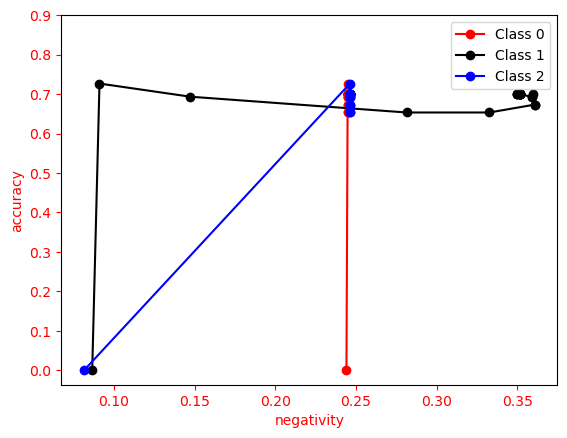

In [11]:
print_negativities(negativities_per_class, scores_list)

Entropies ao longo do treinamento
Classe 0 [3.2859059771679835e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15, 3.4883532205756324e-15]
Classe 1 [3.590830871968043e-15, 3.368826215525007e-15, 3.3260372428089826e-15, 3.636272469138136e-15, 3.3292684644370326e-15, 3.276167849582107e-15, 3.276167849582107e-15, 3.4189931927529094e-15, 3.3929757610210875e-15, 3.3929757610210875e-15, 3.454158154945388e-15, 3.454158154945388e-15, 3.454158154945388e-15, 3.5366549073640184e-15, 3.5366549073640184e-15, 3.5366549073640184e-15, 3.5366549073640184e-15, 3.5366549073640184e-15, 3.5366549073640184e-15, 3.5366549073640184

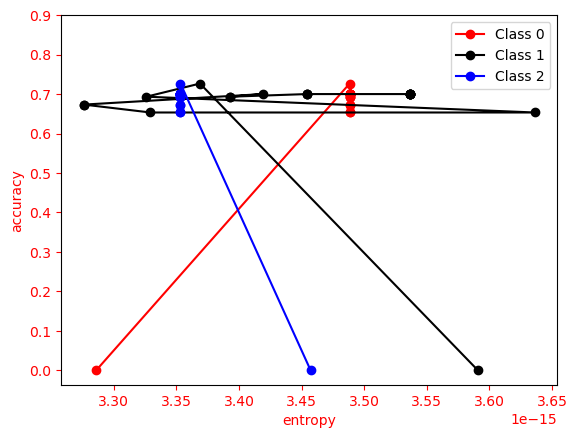

In [12]:
print_entropies(entropies_per_class, scores_list)